# Simple Starter Notebook for;
## Cryptocurrency Closing Price Prediction Challenge


Can you predict the closing price for a cryptocurrency? 

The objective of this challenge is to create a machine learning model that will predict closing price for a crypto currency coing. 

In [ ]:
# Import libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.datasets import make_regression

In [ ]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')

In [ ]:
# check data shapes
train.shape, test.shape, ss.shape

((12632, 49), (6222, 48), (6222, 2))

In [ ]:
# Preview train
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [ ]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [ ]:
ss.head()

,id,close
0,ID_323Sn2,0
1,ID_325SNW,0
2,ID_325uzE,0
3,ID_328qCx,0
4,ID_3293uJ,0


# Let's look for missing values

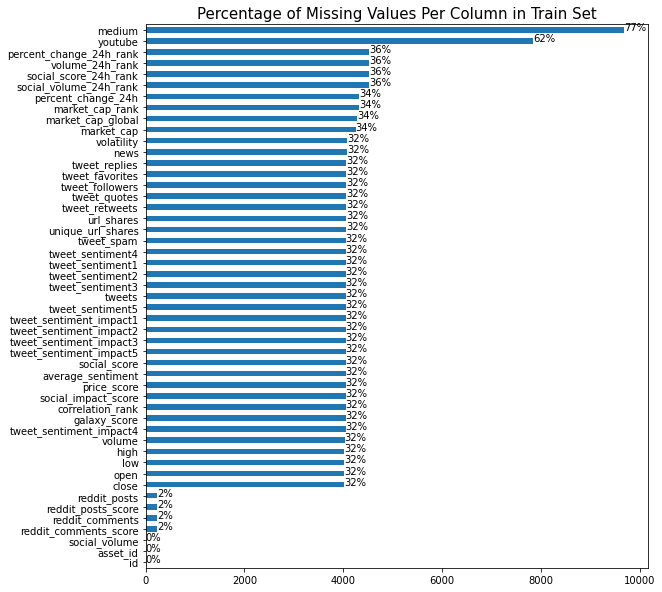

In [ ]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

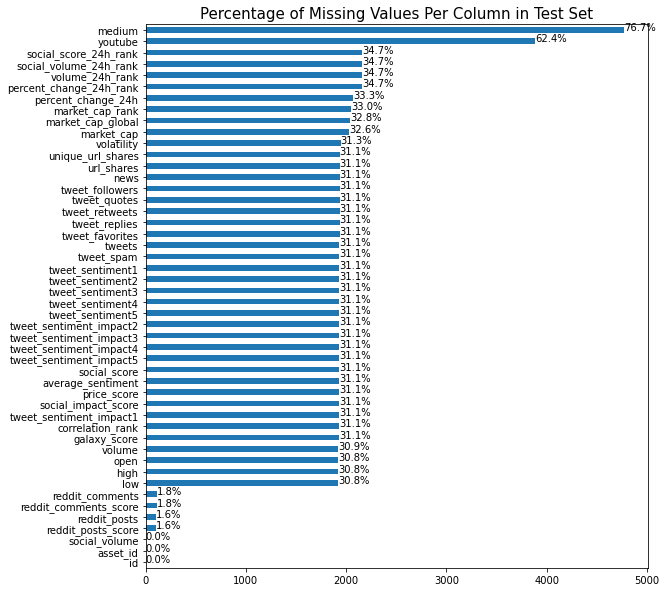

In [ ]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
# fill missing values
train = train.dropna(thresh=6)

train = train.fillna(0)
test = test.fillna(0)


In [ ]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

In [ ]:
# Select main columns to be used in training
#main_cols = ['high','low','open','market_cap','tweet_spam','tweet_sentiment2','volume','tweet_sentiment4','tweets']
main_cols = train.columns.difference(['id', 'close'])
X = train[main_cols]
y = train.close.astype(float)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

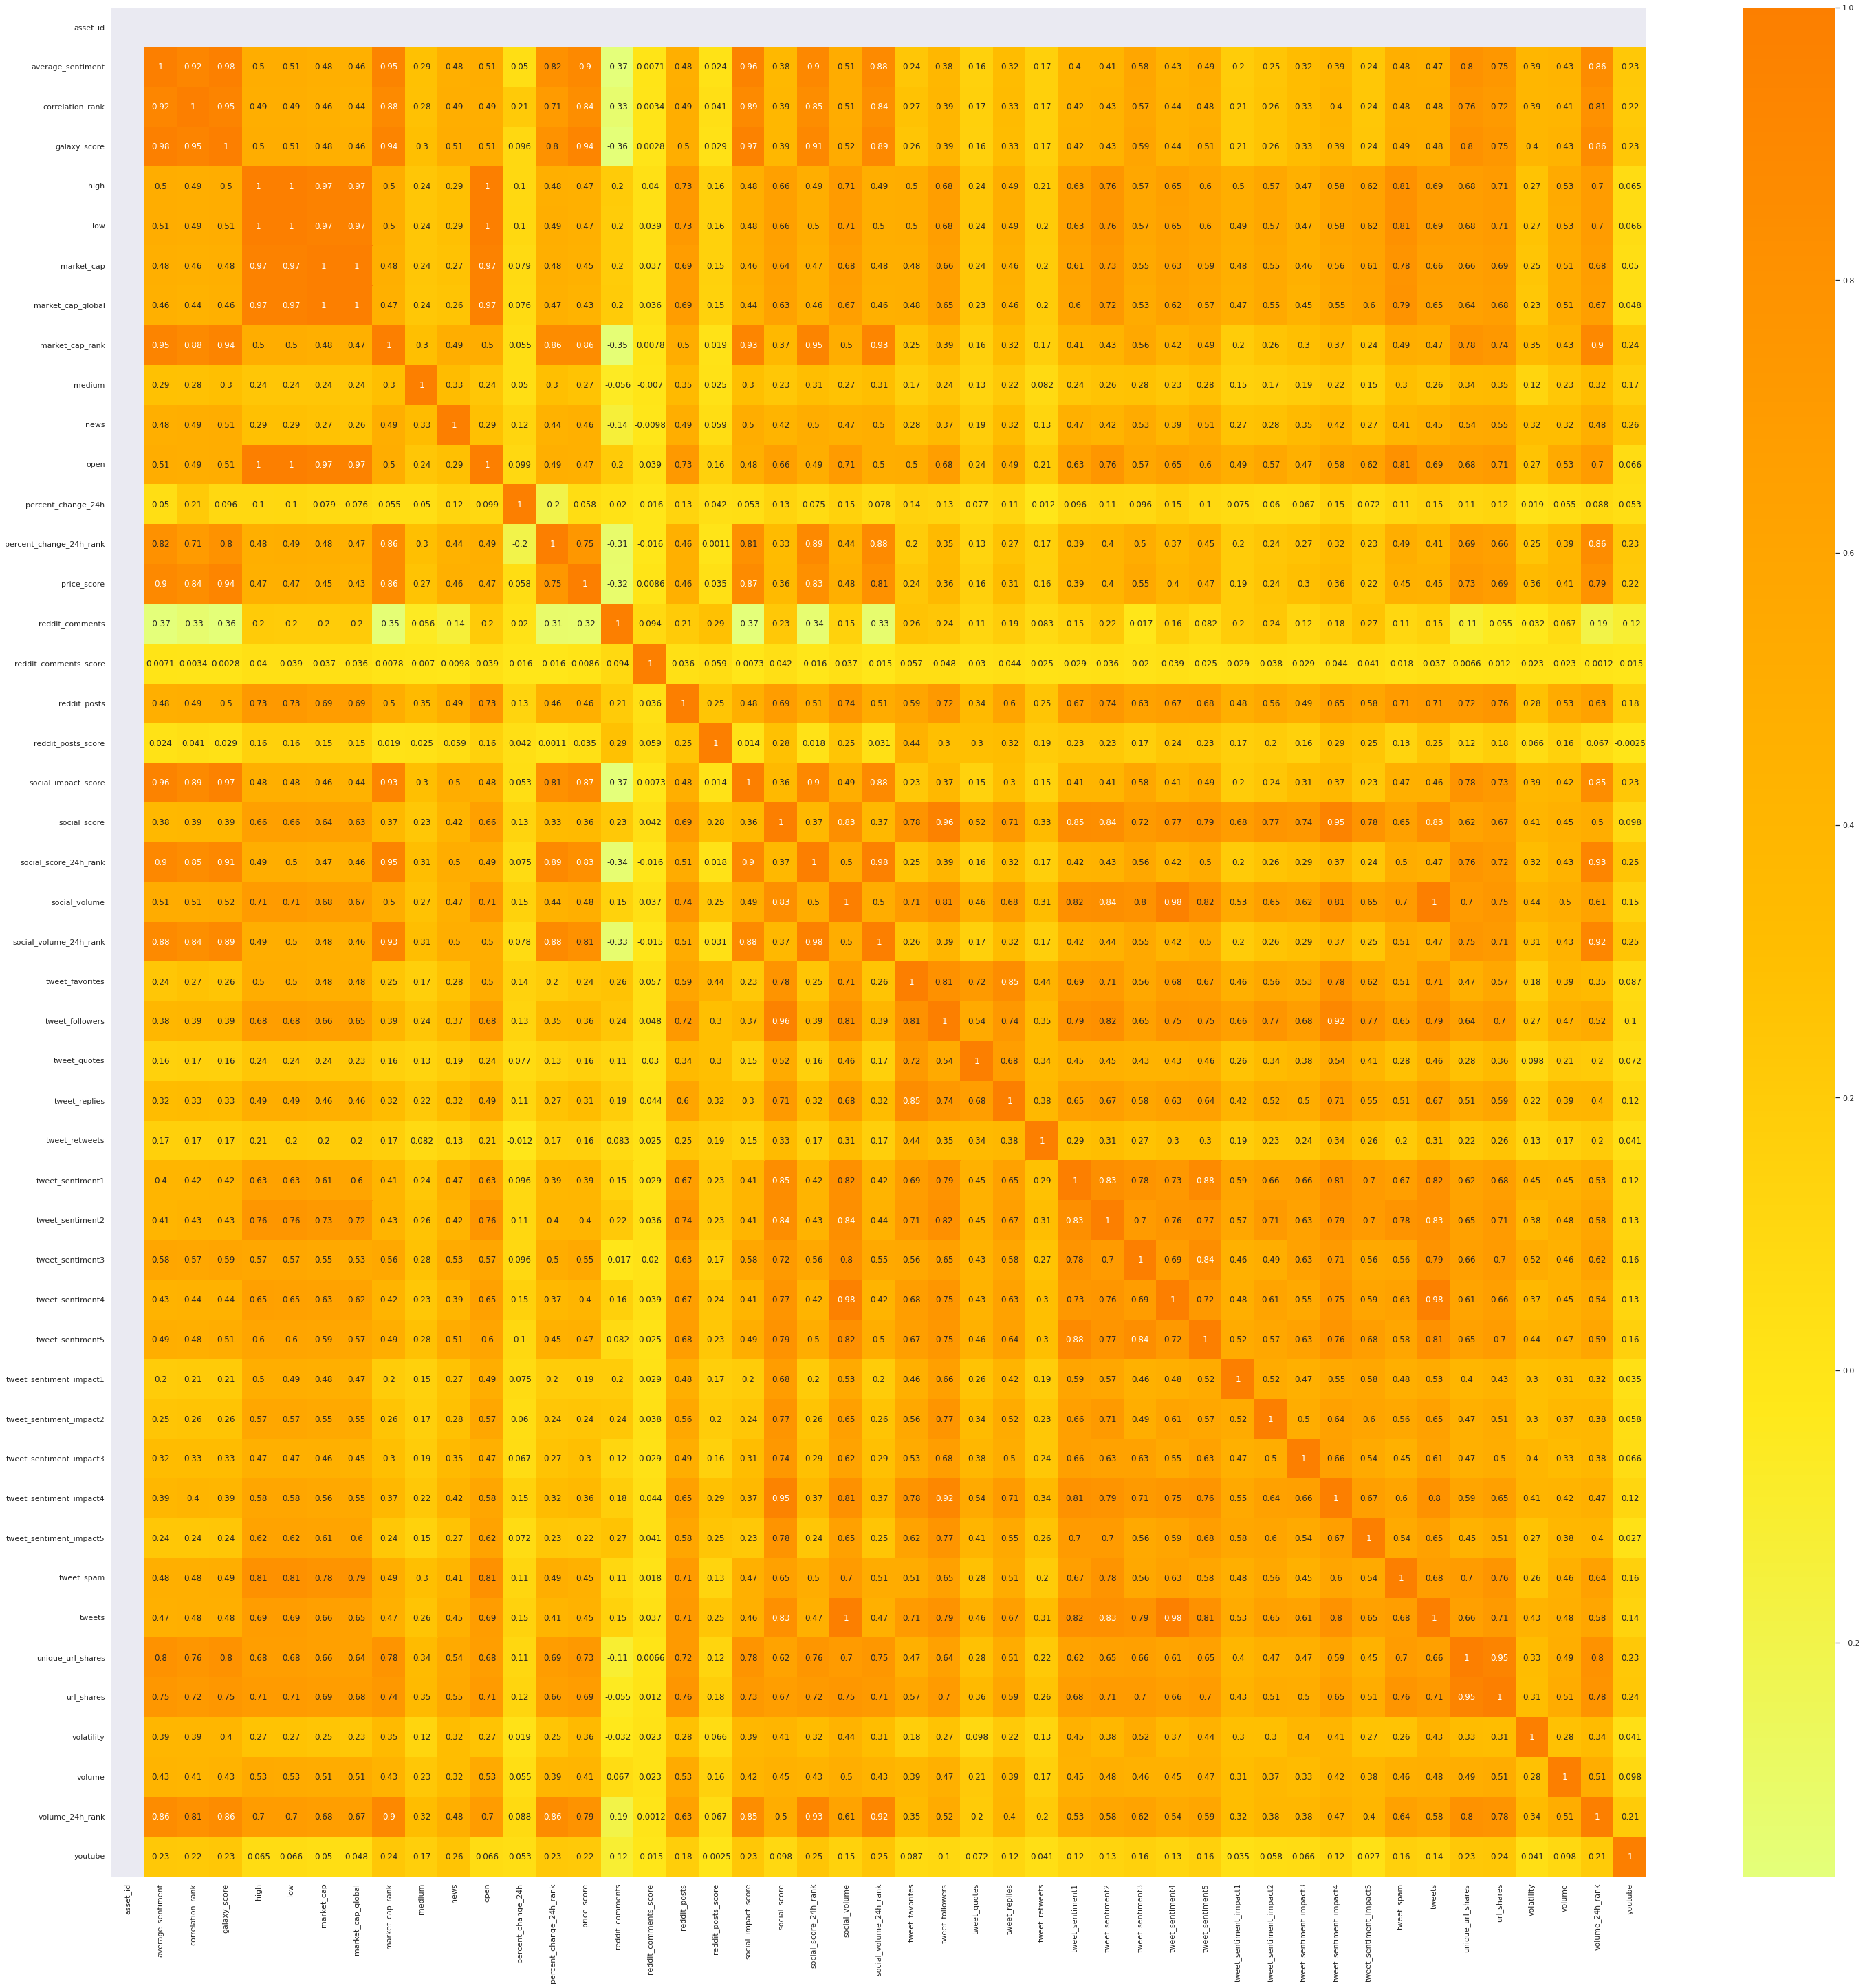

In [ ]:
import seaborn as sns 
corr = X_train.corr()
sns.set(rc = {'figure.figsize':(50,50)})
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [ ]:
corr_features = correlation(X_train, 0.97)
len(set(corr_features))

8

In [ ]:
X_train_corr = X_train.drop(corr_features,axis=1)
X_test_corr = X_test.drop(corr_features,axis=1)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.00479223, 0.69555576, 0.73093188, 0.66238682, 4.27517478,
       4.27344439, 3.69715509, 2.93352754, 0.56501157, 0.16463503,
       0.76376242, 3.70832384, 0.64956454, 0.65223458, 0.65234902,
       0.47384198, 0.25353071, 0.52475915, 0.12236119, 0.87239665,
       0.86351667, 0.55875959, 0.97514795, 0.58724511, 0.83360645,
       0.87118021, 0.7424542 , 0.75503592, 0.75848284, 0.73280943,
       1.13723138, 0.83327231, 1.0096017 , 0.90164451, 0.65421366,
       0.90995239, 0.74438121, 0.82958268, 0.91795306, 1.18601822,
       0.96786686, 0.79952975, 0.82343119, 0.95978229, 1.07522116,
       0.82763235, 0.42483287])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

high                       4.275175
low                        4.273444
open                       3.708324
market_cap                 3.697155
market_cap_global          2.933528
tweet_spam                 1.186018
tweet_sentiment2           1.137231
volume                     1.075221
tweet_sentiment4           1.009602
social_volume              0.975148
tweets                     0.967867
volatility                 0.959782
tweet_sentiment_impact5    0.917953
tweet_sentiment_impact2    0.909952
tweet_sentiment5           0.901645
social_impact_score        0.872397
tweet_followers            0.871180
social_score               0.863517
tweet_favorites            0.833606
tweet_sentiment3           0.833272
tweet_sentiment_impact4    0.829583
volume_24h_rank            0.827632
url_shares                 0.823431
unique_url_shares          0.799530
news                       0.763762
tweet_retweets             0.758483
tweet_replies              0.755036
tweet_sentiment_impact3    0

In [ ]:
# Select main columns to be used in training
main_cols = ['high','low','open','market_cap','tweet_spam','social_volume','social_impact_score','market_cap_rank','social_volume_24h_rank',]


X = train[main_cols]
y = train.close.astype(float)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
# Instantiate model
lm2 = LinearRegression()
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)

In [ ]:
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print(RMSE)

50.27667052486882


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
s1=StandardScaler()
s1.fit(X_train)
X_train=s1.transform(X_train)
X_test=s1.transform(X_test)

In [ ]:
# Instantiate model
lm2 = LinearRegression()
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)

In [ ]:
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print(RMSE)

50.276669632799226


In [ ]:
# Make predictions in test set and prepare submission file
predictions = lm2.predict(test[main_cols])
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('Baseline.csv', index = False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

In [ ]:
sub_file.head()

In [ ]:
files.download('Baseline.csv') 